# 02_01 Baseline

In [1]:
import pandas as pd
import numpy as np
from tensorflow.contrib import keras

from smh_eyetracking.features02 import config as config_features02
from smh_eyetracking.features02.utils.features02_dlib import FEATURES, TARGETS
from smh_eyetracking.keras import config as config_keras
from smh_eyetracking.keras import losses
from smh_eyetracking.utils import data_model

In [3]:
config_features02.FEATURES02_EYES_SIZE

(32, 24)

## Load data

In [2]:
data, imgs_left, imgs_right = data_model.load(
    config_features02.PATH_DATA_FEATURES02_DLIB_AUGMENTED_NORM_CSV,
    config_features02.PATH_DATA_FEATURES02_DLIB_AUGMENTED_NORM_IMGS_LEFT,
    config_features02.PATH_DATA_FEATURES02_DLIB_AUGMENTED_NORM_IMGS_RIGHT
)

## Split data

In [3]:
(
    (train_data, train_imgs_left, train_imgs_right),
    (validation_data, validation_imgs_left, validation_imgs_right),
    (test_data, test_imgs_left, test_imgs_right)
) = data_model.split(
    data, imgs_left, imgs_right,
    validation_size=0.15,
    test_size=0.15
)

In [4]:
print("Train length: {}".format(len(train_data)))
print("Validation length: {}".format(len(validation_data)))
print("Test length: {}".format(len(test_data)))

Train length: 65763
Validation length: 383
Test length: 447


## Model

### Architecture

![](img/models/02-baseline.png)

In [5]:
img_width, img_height = config_features02.FEATURES02_EYES_SIZE
img_shape = (img_height, img_width)

def get_model():

    # Inputs
    left_imgs = keras.layers.Input(shape=img_shape, name='left_imgs', dtype='float32')
    right_imgs = keras.layers.Input(shape=img_shape, name='right_imgs', dtype='float32')
    features = keras.layers.Input(shape=(len(FEATURES),), name='features', dtype='float32')
    # Flatten images & concatenate
    flat_input = keras.layers.Concatenate()([
        keras.layers.Flatten()(left_imgs),
        keras.layers.Flatten()(right_imgs),
        features
    ])
    # Dense
    d_1 = keras.layers.Dense(1024, activation=keras.activations.relu)(flat_input)
    d_2 = keras.layers.Dense(512, activation=keras.activations.relu)(d_1)
    d_3 = keras.layers.Dense(128, activation=keras.activations.relu)(d_2)
    d_4 = keras.layers.Dense(2)(d_3)
    # Model
    model = keras.models.Model(
        inputs=[left_imgs, right_imgs, features],
        outputs=[d_4]
    )
    return model

### Parameters

In [6]:
MODEL_NAME = '01_baseline-02'

EPOCHS = 200
BATCH_SIZE = 128
LEARNING_RATE = 0.0005
DECAY = 0.00001

LOSS = losses.mean_euclidean

In [7]:
model = get_model()


model.compile(
    loss=LOSS,
    metrics=[losses.mean_euclidean],
    optimizer=keras.optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=DECAY)
)

print("Parameters to adjust: {}".format(
    np.sum([keras.backend.count_params(p) for p in set(model.trainable_weights)])
))

Parameters to adjust: 2246530


### Train

In [8]:
model.fit(
    x={
        'left_imgs':train_imgs_left,
        'right_imgs': train_imgs_right,
        'features': train_data[FEATURES].as_matrix()
    },
    y=train_data[TARGETS].as_matrix(),
    validation_data=(
        {
            'left_imgs': validation_imgs_left,
            'right_imgs': validation_imgs_right,
            'features': validation_data[FEATURES].as_matrix()
        },
        validation_data[TARGETS].as_matrix()
    ),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1, callbacks=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0
)

Train on 65763 samples, validate on 383 samples
Epoch 1/200
65763/65763 [==============================] - 7s - loss: 0.3543 - mean_euclidean: 0.3543 - val_loss: 0.2562 - val_mean_euclidean: 0.2562
Epoch 2/200
65763/65763 [==============================] - 4s - loss: 0.2532 - mean_euclidean: 0.2532 - val_loss: 0.2304 - val_mean_euclidean: 0.2304
Epoch 3/200
65763/65763 [==============================] - 4s - loss: 0.2173 - mean_euclidean: 0.2173 - val_loss: 0.2404 - val_mean_euclidean: 0.2404
Epoch 4/200
65763/65763 [==============================] - 4s - loss: 0.1978 - mean_euclidean: 0.1978 - val_loss: 0.2137 - val_mean_euclidean: 0.2137
Epoch 5/200
65763/65763 [==============================] - 4s - loss: 0.1785 - mean_euclidean: 0.1785 - val_loss: 0.2132 - val_mean_euclidean: 0.2132
Epoch 6/200
65763/65763 [==============================] - 4s - loss: 0.1677 - mean_euclidean: 0.1677 - val_loss: 0.1996 - val_mean_euclidean: 0.1996
Epoch 7/200
65763/65763 [===========================

65763/65763 [==============================] - 4s - loss: 0.0457 - mean_euclidean: 0.0457 - val_loss: 0.1818 - val_mean_euclidean: 0.1818
Epoch 56/200
65763/65763 [==============================] - 4s - loss: 0.0447 - mean_euclidean: 0.0447 - val_loss: 0.1768 - val_mean_euclidean: 0.1768
Epoch 57/200
65763/65763 [==============================] - 4s - loss: 0.0445 - mean_euclidean: 0.0445 - val_loss: 0.1800 - val_mean_euclidean: 0.1800
Epoch 58/200
65763/65763 [==============================] - 3s - loss: 0.0444 - mean_euclidean: 0.0444 - val_loss: 0.1761 - val_mean_euclidean: 0.1761
Epoch 59/200
65763/65763 [==============================] - 4s - loss: 0.0432 - mean_euclidean: 0.0432 - val_loss: 0.1783 - val_mean_euclidean: 0.1783
Epoch 60/200
65763/65763 [==============================] - 4s - loss: 0.0430 - mean_euclidean: 0.0430 - val_loss: 0.1794 - val_mean_euclidean: 0.1794
Epoch 61/200
65763/65763 [==============================] - 4s - loss: 0.0430 - mean_euclidean: 0.0430 - va

65763/65763 [==============================] - 3s - loss: 0.0207 - mean_euclidean: 0.0207 - val_loss: 0.1749 - val_mean_euclidean: 0.1749
Epoch 163/200
65763/65763 [==============================] - 3s - loss: 0.0205 - mean_euclidean: 0.0205 - val_loss: 0.1753 - val_mean_euclidean: 0.1753
Epoch 164/200
65763/65763 [==============================] - 3s - loss: 0.0207 - mean_euclidean: 0.0207 - val_loss: 0.1752 - val_mean_euclidean: 0.1752
Epoch 165/200
65763/65763 [==============================] - 3s - loss: 0.0209 - mean_euclidean: 0.0209 - val_loss: 0.1753 - val_mean_euclidean: 0.1753
Epoch 166/200
65763/65763 [==============================] - 3s - loss: 0.0207 - mean_euclidean: 0.0207 - val_loss: 0.1759 - val_mean_euclidean: 0.1759
Epoch 167/200
65763/65763 [==============================] - 3s - loss: 0.0203 - mean_euclidean: 0.0203 - val_loss: 0.1757 - val_mean_euclidean: 0.1757
Epoch 168/200
65763/65763 [==============================] - 3s - loss: 0.0203 - mean_euclidean: 0.020

In [9]:
model.save(config_keras.PATH_MODELS_KERAS+MODEL_NAME)

### Test

In [10]:
model_test = keras.models.load_model(
    filepath=config_keras.PATH_MODELS_KERAS+MODEL_NAME,
    custom_objects={
        "mean_euclidean": losses.mean_euclidean,
        "ms_euclidean": losses.ms_euclidean,
        "reg_mean_euclidean": losses.reg_mean_euclidean
    }
)

In [11]:
model_test.evaluate(
    x={
        'left_imgs':test_imgs_left,
        'right_imgs': test_imgs_right,
        'features': test_data[FEATURES].as_matrix()
    },
    y=test_data[TARGETS].as_matrix(),
    batch_size=1,
    verbose=1, sample_weight=None
)

440/447 [============================>.] - ETA: 0s

[0.17644850096521561, 0.17644850096521561]

### Results


| Name | Epochs | Batch Size | Learning rate | Decay | Loss | Train | Validation | Test |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
| 01_baseline-01 | 50 | 128| 0.0005 | 0.00001 | mean_euclidean | 0.0473 | 0.1880 | 0.2112 |
| 01_baseline-02 | 200 | 128| 0.0005 | 0.00001 | mean_euclidean | 0.0176 | 0.1753 | 0.1765 |

157 epochs seem to be enough

### Errors

In [12]:
import seaborn as sns
%matplotlib inline


#### Test

In [13]:
test_predictions = model_test.predict(
    x={
        'left_imgs':test_imgs_left,
        'right_imgs': test_imgs_right,
        'features': test_data[FEATURES].as_matrix()
    }
)

/home/ubuntu/hci-eye_tracking-workshop/venv3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


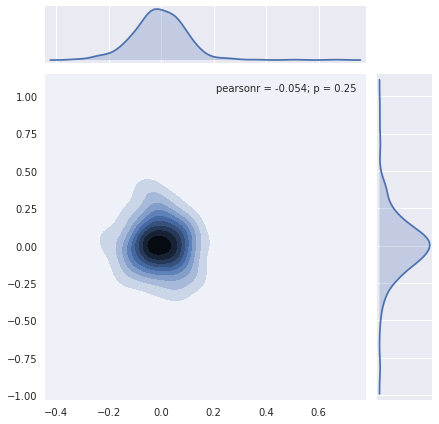

In [14]:
test_errors = test_data[TARGETS].as_matrix()-test_predictions
sns.jointplot(x=test_errors[:,0], y=test_errors[:,1], kind="kde")

/home/ubuntu/hci-eye_tracking-workshop/venv3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


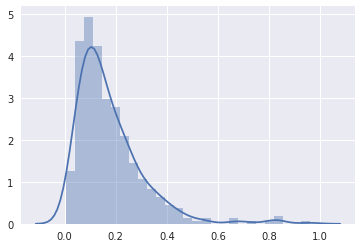

In [15]:
test_euclidean_errors = np.linalg.norm(test_errors, ord=2, axis=1)
sns.distplot(test_euclidean_errors)

#### Train

In [16]:
train_predictions = model_test.predict(
    x={
        'left_imgs':train_imgs_left,
        'right_imgs': train_imgs_right,
        'features': train_data[FEATURES].as_matrix()
    }
)

/home/ubuntu/hci-eye_tracking-workshop/venv3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


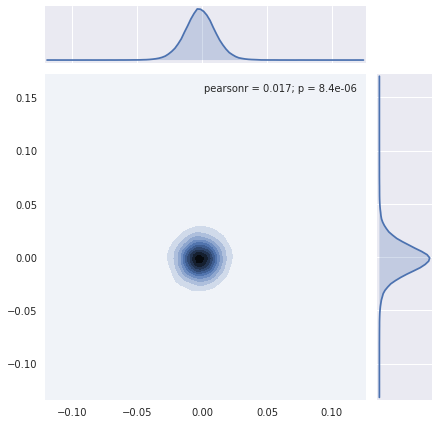

In [17]:
train_errors = train_data[TARGETS].as_matrix()-train_predictions
sns.jointplot(x=train_errors[:,0], y=train_errors[:,1], kind="kde")

/home/ubuntu/hci-eye_tracking-workshop/venv3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


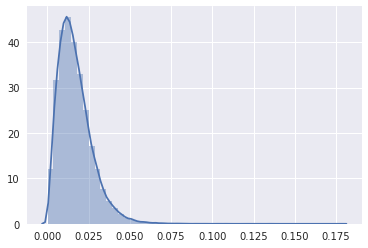

In [18]:
train_euclidean_errors = np.linalg.norm(train_errors, ord=2, axis=1)
sns.distplot(train_euclidean_errors)